### Protein Synthesis and Sequence Analysis of Covid

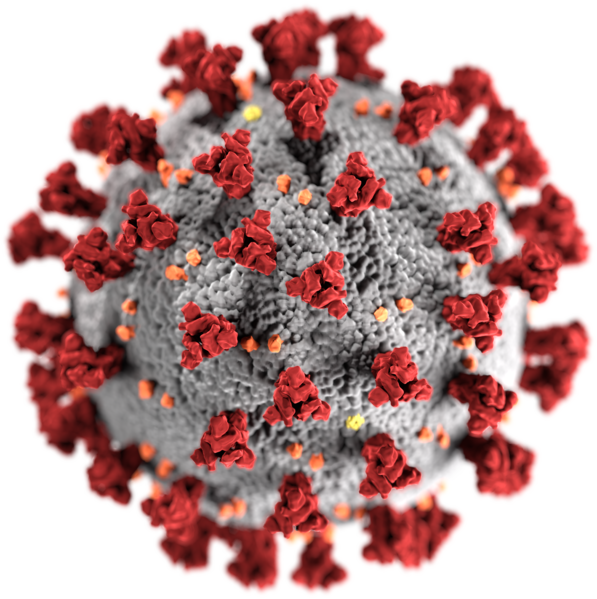

In [1]:
# Id MT385497
# https://www.ncbi.nlm.nih.gov/nuccore/MT385497?report=fasta&log$=seqview

#### Outline
+ Reading
+ Sequence Analysis
+ Freq N,AA,CG,AT content
+ Protein Synthesis

In [2]:
from Bio import SeqIO

In [3]:
# Reading our fasta file
covid_record = SeqIO.read("covid_sequence_MT385497.fasta", "fasta")

In [4]:
covid_record

SeqRecord(seq=Seq('CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAA...TTT'), id='MT385497.1', name='MT385497.1', description='MT385497.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/CA-CZB-IX00017/2020, complete genome', dbxrefs=[])

In [5]:
# seq
covid_dna = covid_record.seq

In [6]:
covid_dna

Seq('CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAA...TTT')

In [7]:
# len of DNA
len(covid_dna)

29803

In [8]:
# Transcription
# DNA to mRNA
covid_mrna = covid_dna.transcribe()

In [9]:
covid_mrna

Seq('CAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAA...UUU')

In [10]:
len(covid_mrna)

29803

In [11]:
# Translation
# mRNA to Protein
covid_protein = covid_mrna.translate()

C:\Users\IT Center\AppData\Roaming\Python\Python39\site-packages\Bio\Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [12]:
covid_protein

Seq('QVTNQPTFDLL*ICSLNEL*NLCGCHSAACLVHSRSIINN*LLSLTGHE*LVYL...N*F')

In [13]:
len(covid_protein)

9934

### Sequence Analysis
+ Freq of N/Bases and Amino Acid

In [14]:
# check for the N or bases
covid_dna

Seq('CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAA...TTT')

In [15]:
from collections import Counter

In [16]:
covid_n_freq = Counter(covid_dna)

In [17]:
covid_n_freq

Counter({'C': 4818, 'A': 7825, 'G': 5136, 'T': 8348, 'N': 3676})

In [18]:
# plot frequencies
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

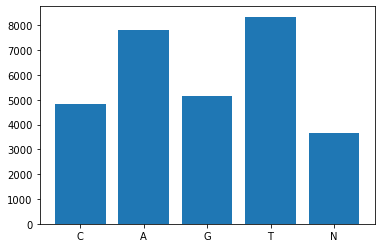

In [19]:
plt.bar(covid_n_freq.keys(), covid_n_freq.values())

In [20]:
# Molecular weight
from Bio.SeqUtils import molecular_weight

In [21]:
molecular_weight(covid_dna.replace("N",""))

8074343.12620062

#### DNA Composition
+ GC Content
+ AC Content

In [22]:
from Bio.SeqUtils import gc_fraction,GC123,GC_skew,xGC_skew

In [23]:
gc_fraction(covid_dna)

0.380985187736824

In [24]:
# AT Content
def at_fraction(seq):
    return float(seq.count("A") + seq.count("T"))/len(seq) * 100

In [25]:
at_fraction(covid_dna)

54.26634902526592

In [26]:
from Bio.SeqUtils import MeltingTemp as mt

In [28]:
mt.Tm_GC(covid_dna, strict=False)

76.10502937459844

In [29]:
# Check the number of Amino Acid
covid_protein

Seq('QVTNQPTFDLL*ICSLNEL*NLCGCHSAACLVHSRSIINN*LLSLTGHE*LVYL...N*F')

In [30]:
# Freq
covid_pr_freq = Counter(covid_protein)

<BarContainer object of 22 artists>

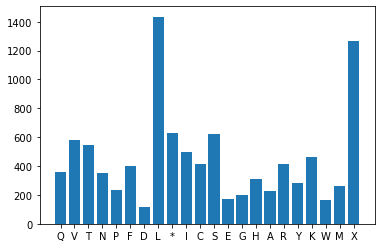

In [32]:
plt.bar(covid_pr_freq.keys(),covid_pr_freq.values())

In [33]:
covid_pr_freq = Counter(covid_protein).most_common(6)

In [34]:
type(covid_pr_freq)

list

In [35]:
# Amino Acids
covid_pr_freq

[('L', 1435), ('X', 1268), ('*', 632), ('S', 619), ('V', 583), ('T', 544)]

In [36]:
dict(covid_pr_freq)

{'L': 1435, 'X': 1268, '*': 632, 'S': 619, 'V': 583, 'T': 544}

In [38]:
# Longest Seq AA before a stop codon
covid_clean = covid_protein.split("*")

In [39]:
covid_clean = [str(i) for i in covid_clean]

In [41]:
covid_clean[0:10]

['QVTNQPTFDLL',
 'ICSLNEL',
 'NLCGCHSAACLVHSRSIINN',
 'LLSLTGHE',
 'LVYLLQAAYGFVRVAADHQHI',
 'VSSGCDRKVRWRALSLVSTRKHTSNSVCLFYRFATCSYVALETPWRRSYQRHVNILKMALVA',
 '',
 'KLKKAFCLNLNSPMCSSNVRMLELHLMVMLWLSW',
 'QNSKAFSTVVVVRHLVSLSLMWAKYQWLTARFFFVRTVIKELVAIVTAPI',
 'SHLT']

In [40]:
import pandas as pd

In [46]:
df = pd.DataFrame(covid_clean, columns=["Amino_Acids"])

In [47]:
df

,Amino_Acids
0,QVTNQPTFDLL
1,ICSLNEL
2,NLCGCHSAACLVHSRSIINN
3,LLSLTGHE
4,LVYLLQAAYGFVRVAADHQHI
...,...
628,LTLISHSNL
629,SVCNIREDLKEPPHFHRGHAEYDRVYSEQC
630,GELPIWKSPNV
631,N


In [52]:
df["Count"] = df["Amino_Acids"].str.len()

In [53]:
df

,Amino_Acids,Count
0,QVTNQPTFDLL,11
1,ICSLNEL,7
2,NLCGCHSAACLVHSRSIINN,20
3,LLSLTGHE,8
4,LVYLLQAAYGFVRVAADHQHI,21
...,...,...
628,LTLISHSNL,9
629,SVCNIREDLKEPPHFHRGHAEYDRVYSEQC,30
630,GELPIWKSPNV,11
631,N,1


In [54]:
df.head()

,Amino_Acids,Count
0,QVTNQPTFDLL,11
1,ICSLNEL,7
2,NLCGCHSAACLVHSRSIINN,20
3,LLSLTGHE,8
4,LVYLLQAAYGFVRVAADHQHI,21


In [55]:
df.nlargest(10, "Count")

,Amino_Acids,Count
594,SSGLNELNIILVFLFGTLILAMADSNGTITVEELKKLLEQWNLVIG...,243
161,LPLILYYSLXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,130
612,TNMKFLVFLGIITTVAAFHQECSLQSCTQHQPYVVDDPCPIHFYSK...,123
44,MSGVWLHTTYLMSLVSLNWLXXXXXXXXXXXXXKXKXXXXXXXXXX...,114
613,TNKLKCLIMDPKISEMHPALRLVDPQIQLAVTRMENAVGRDQNNVG...,105
527,IRRPSPYLLLITLLMLLLKSVNFNFVMIHFWVFITTKTTKVGWKVS...,101
550,LLNKTKTPKKFLHKSNKFTKHHQLKILVVLIFHKYXXXXXXXXXXX...,98
524,SLVSVLILQPELNYPLHTLILSHVVFITLTKFSXXXXXXXLRTCSY...,89
96,MVMWWLLIINTTHPLLRKELNCYINLLFGMLTMQLIKPRINQIPGV...,87
616,IHQKITLAPAILLTMLQSCYNFLKEQHCQKASTQKGAEAAVKPLLV...,87


# Well Done!